<a href="https://colab.research.google.com/github/HassanAlhajAli/Breast_Cancer_Classifiers/blob/master/Jupyter%20Notebook%20-%20Offline%20version%20of%20the%20solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Classification on the Breast Cancer Wisconsin dataset using Python's Sklearn library.


 # Table of Contents
1. [Load the dataset](#load)
2. [Data Cleaning](#clean)
  1. [Missing Values](#missing)
  2. [Duplicates](#duplicates)
  3. [Outliers](#outliers)
3. [Data Visualization](#visualize)
  1. [Scatterplots](#scatterplots)
  2. [Histograms](#histograms)
  3. [Boxplots](#boxplots)
  4. [Bar Charts](#bar_charts)
  5. [Heatmaps](#heatmaps)
4. [Classification](#classify)
  1. [Logistic Regression](#logistic)
  2. [Decision Tree Classifier](#tree)
  3. [Random Forest Classifier](#forest)
  4. [K-Nearest Neighbors Classifier](#k)
  5. [Support Vector Machines (SVM) Classifier ](#svm)
5. [Models Performance](#perform)
6. [Hyperparameter Tuning](#tune)
7. [Feature Selection](#feature)
8. [Model Comparison](#compare)
9. [Conclusions](#conclude)



# 1 - Load the dataset<a name="load"></a>: Load the Breast Cancer Wisconsin dataset using Python's sklearn.datasets library.

In [ ]:
# Importing the necessary libraries and the proper dataset
from sklearn.datasets import load_breast_cancer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Breast Cancer Wisconsin dataset
data = load_breast_cancer()
print('Breast Cancer Wisconsin dataset got loaded')

# Create a pandas DataFrame from the dataset's data and feature names
df = pd.DataFrame(data=data.data, columns=data.feature_names)

# # # # #
# Showing the info of the dataframe (for testing purposes)
# df.info()
# # # # #

# Add the target variable to the DataFrame as a new column (malignant or benign)
df['target'] = data.target

# # # # #
# Showing the info of the dataframe (in order to test the added 'target' column)
# df.info()
# # # # #

# Display the target names of the loaded data
list(data.target_names)

Breast Cancer Wisconsin dataset got loaded


['malignant', 'benign']

# Displaying the first few rows of the dataset:

In [ ]:
# Display the first few rows of the DataFrame
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Checking target values count (where 1 stands for benign and 0 for malignant)

1    357
0    212
Name: target, dtype: int64


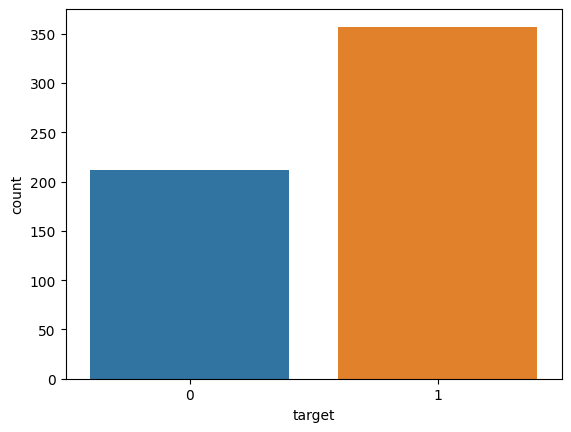

In [ ]:
print(df['target'].value_counts())
sns.countplot(data=df, x='target')
plt.show()

# 2. Data Cleaning: <a name="clean"></a>
*2 - 1: Checking for missing values* <a name="missing"></a>

In [ ]:
print('Checking for missing values:')

# Check for any missing value (True / False)
df.isnull().values.any()
# Check for number of missing values
print(df.isnull().sum())

# In case of any missing values, remove them from the DataFrame
df.dropna(inplace=True)

Checking for missing values:
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


*2 - 2: Checking for duplicates* <a name="duplicates"></a>

In [ ]:
print('\nChecking for duplicates:')
# Check for duplicates
print(df.duplicated().sum(), ' duplicate value(s) were/was found. ')

# In case of any duplicates, drop them from the DataFrame...
df.drop_duplicates(inplace=True)


Checking for duplicates:
0  duplicate value(s) were/was found. 


In [ ]:
# Note that there are no categorical (non-numerical values) data in the dataset
df.select_dtypes(include='object').columns

Index([], dtype='object')

*2 - 3: Checking for outliers.*   <a name="outliers"></a>

In [ ]:
# To show all columns
pd.set_option('display.max_columns', None)

# Check for outliers
print(df.describe())

       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

# 3. Data Visualization <a name="visualize"></a>

*3 - 1: Scatterplots* <a name="scatterplots"></a>

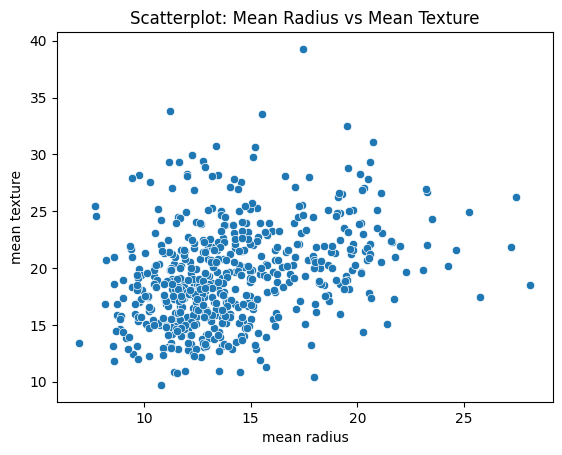

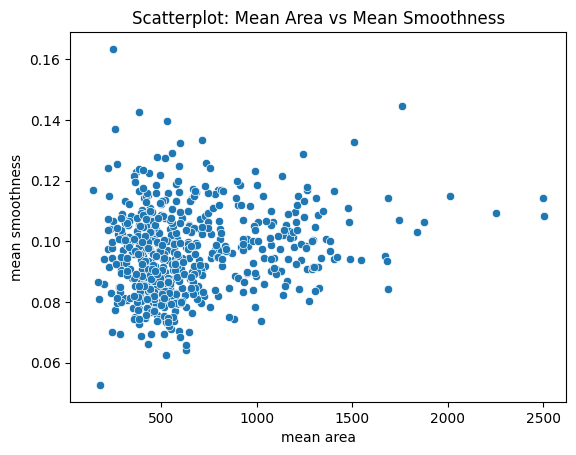

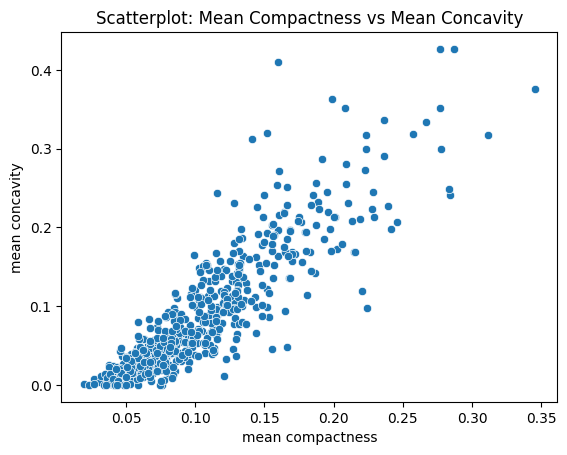

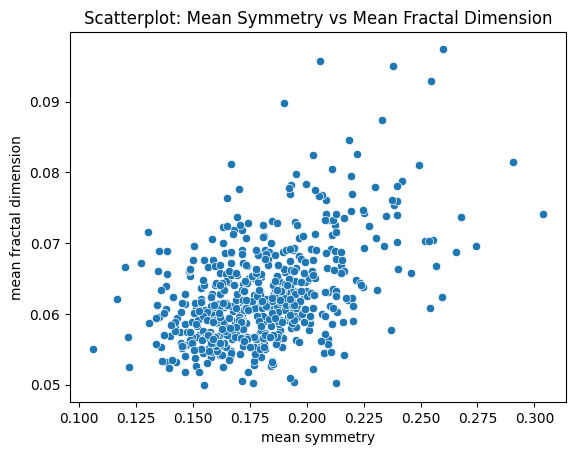

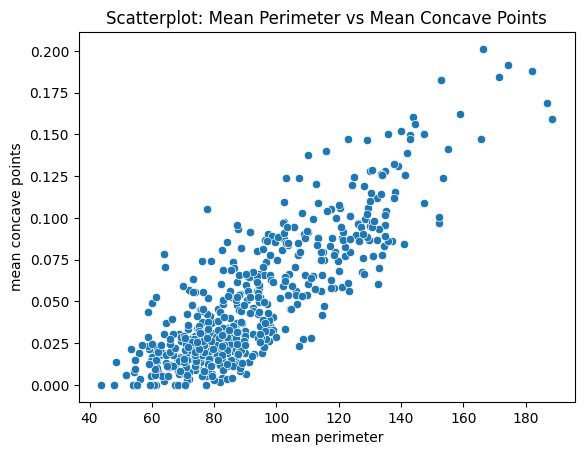

In [ ]:
# Scatterplot between "mean radius" and "mean texture"
sns.scatterplot(data=df, x="mean radius", y="mean texture")
plt.title("Scatterplot: Mean Radius vs Mean Texture")
plt.show()
print()

# Scatterplot between "mean area" and "mean smoothness"
sns.scatterplot(data=df, x="mean area", y="mean smoothness")
plt.title("Scatterplot: Mean Area vs Mean Smoothness")
plt.show()
print()


# Scatterplot between "mean compactness" and "mean concavity"
sns.scatterplot(data=df, x="mean compactness", y="mean concavity")
plt.title("Scatterplot: Mean Compactness vs Mean Concavity")
plt.show()
print()


# Scatterplot between "mean symmetry" and "mean fractal dimension"
sns.scatterplot(data=df, x="mean symmetry", y="mean fractal dimension")
plt.title("Scatterplot: Mean Symmetry vs Mean Fractal Dimension")
plt.show()
print()


# Scatterplot between "mean perimeter" and "mean concave points"
sns.scatterplot(data=df, x="mean perimeter", y="mean concave points")
plt.title("Scatterplot: Mean Perimeter vs Mean Concave Points")
plt.show()

*3 - 2: Histograms* <a name="histograms"></a>

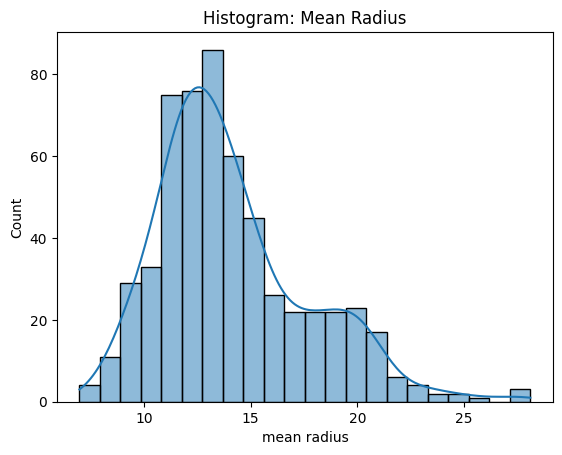

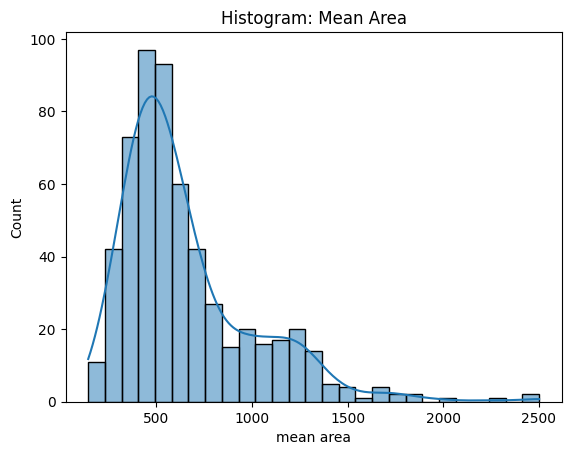

In [ ]:
# Create a histogram for 'mean radius'
sns.histplot(data=df, x='mean radius', kde=True)
plt.title("Histogram: Mean Radius")
plt.show()
print()


# Create a histogram for 'mean area'
sns.histplot(data=df, x='mean area', kde=True)
plt.title("Histogram: Mean Area")
plt.show()

*3 - 3: Boxplots* <a name="boxplots"></a>

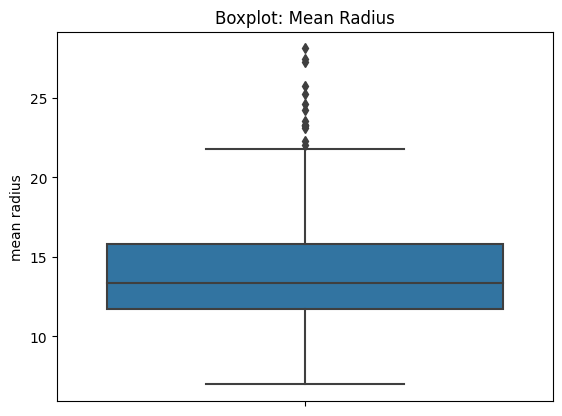

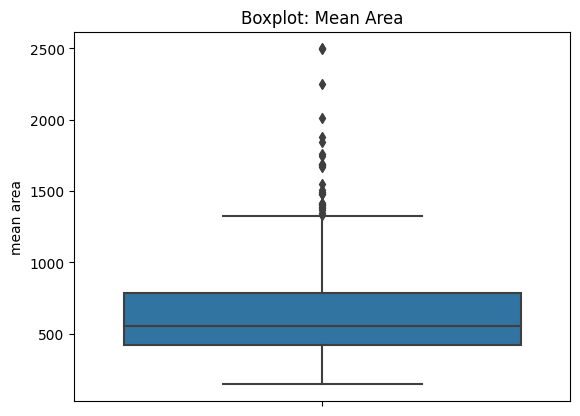

In [ ]:
# Create a boxplot for 'mean radius'
sns.boxplot(data=df, y='mean radius')
plt.title("Boxplot: Mean Radius")
plt.show()
print()


# Create a boxplot for 'mean area'
sns.boxplot(data=df, y='mean area')
plt.title("Boxplot: Mean Area")
plt.show()

*3 - 4: Bar charts* <a name="bar_charts"></a>

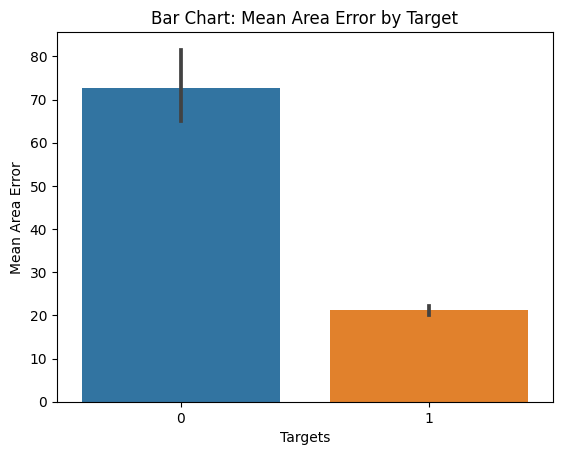

In [ ]:
sns.barplot(data=df, x='target', y='area error')
plt.title("Bar Chart: Mean Area Error by Target")
plt.xlabel("Targets")
plt.ylabel("Mean Area Error")
plt.show()

*3 - 5: Heatmaps* <a name="heatmaps"></a>

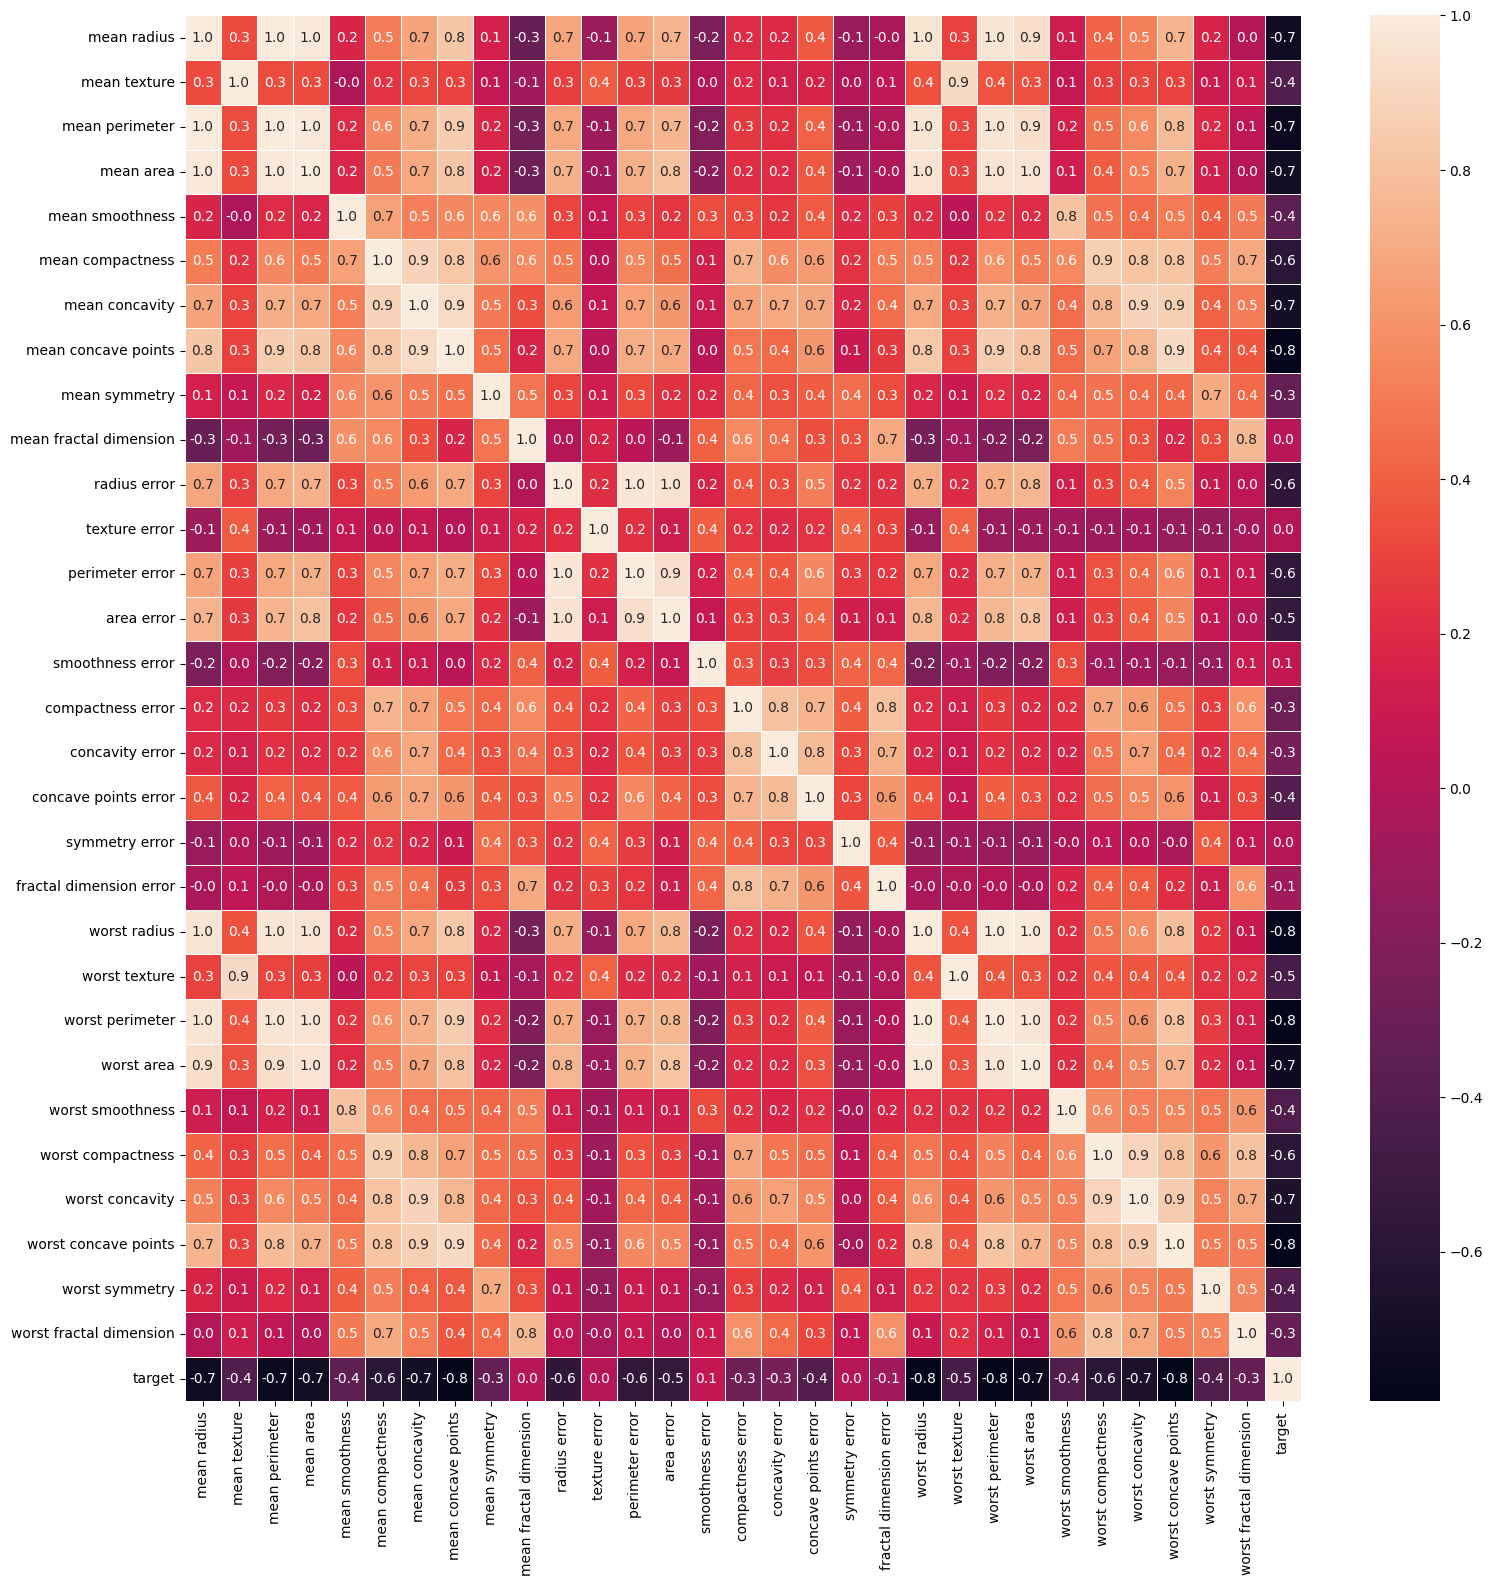

In [ ]:
# Compute the correlation matrix
corr_Matrix = df.corr()
# Create a heatmap
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap (corr_Matrix, linewidths = 0.5, annot = True, fmt= '.1f',ax=ax)
plt.show ()

# 4. Classification <a name="classify"></a>


In [ ]:
# Before applying in classification algorithm, splitting the data into
# training and testing data is required
from sklearn.model_selection import train_test_split

X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import MinMaxScaler

# Create the scaler object
scaler = MinMaxScaler()

# Fit the scaler to the training data
scaler.fit(X_train)

# Scale the training and test data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler ()
X_train = sc.fit_transform (X_train)
X_test = sc.transform (X_test)

*4 - 1: Logistic Regression* <a name="logistic"></a>

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

# Create the model
logreg = LogisticRegression()

# Fit the model to the training data
logreg.fit(X_train, y_train)

# Predict on the test data
y_pred = logreg.predict(X_test)

acc_log = accuracy_score(y_test, y_pred)
precision_log = precision_score(y_test, y_pred)
recall_log = recall_score(y_test, y_pred)
f1_log = f1_score(y_test, y_pred)

# Calculate the probabilities of the positive class
y_prob = logreg.predict_proba(X_test)[:, 1]
auc_log = roc_auc_score(y_test, y_prob)

*4 - 2: Decision Tree Classifier* <a name="tree"></a>

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create the model
dtc = DecisionTreeClassifier()

# Fit the model to the training data
dtc.fit(X_train, y_train)

# Predict on the test data
y_pred = dtc.predict(X_test)

acc_dtc = accuracy_score(y_test, y_pred)
precision_dtc = precision_score(y_test, y_pred)
recall_dtc = recall_score(y_test, y_pred)
f1_dtc = f1_score(y_test, y_pred)

# Calculate the probabilities of the positive class
y_prob = dtc.predict_proba(X_test)[:, 1]
auc_dtc = roc_auc_score(y_test, y_prob)

|--- feature_7 <= 0.08
|   |--- feature_20 <= 0.12
|   |   |--- feature_10 <= 0.79
|   |   |   |--- feature_24 <= 2.00
|   |   |   |   |--- feature_14 <= -1.21
|   |   |   |   |   |--- feature_14 <= -1.22
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_14 >  -1.22
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_14 >  -1.21
|   |   |   |   |   |--- feature_21 <= 1.29
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_21 >  1.29
|   |   |   |   |   |   |--- feature_21 <= 1.32
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_21 >  1.32
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |--- feature_24 >  2.00
|   |   |   |   |--- class: 0
|   |   |--- feature_10 >  0.79
|   |   |   |--- feature_25 <= -1.08
|   |   |   |   |--- class: 0
|   |   |   |--- feature_25 >  -1.08
|   |   |   |   |--- class: 1
|   |--- feature_20 >  0.12
|   |   |--- feature_21 <= -0.93
|   |   |   |--- class: 1
|   |   

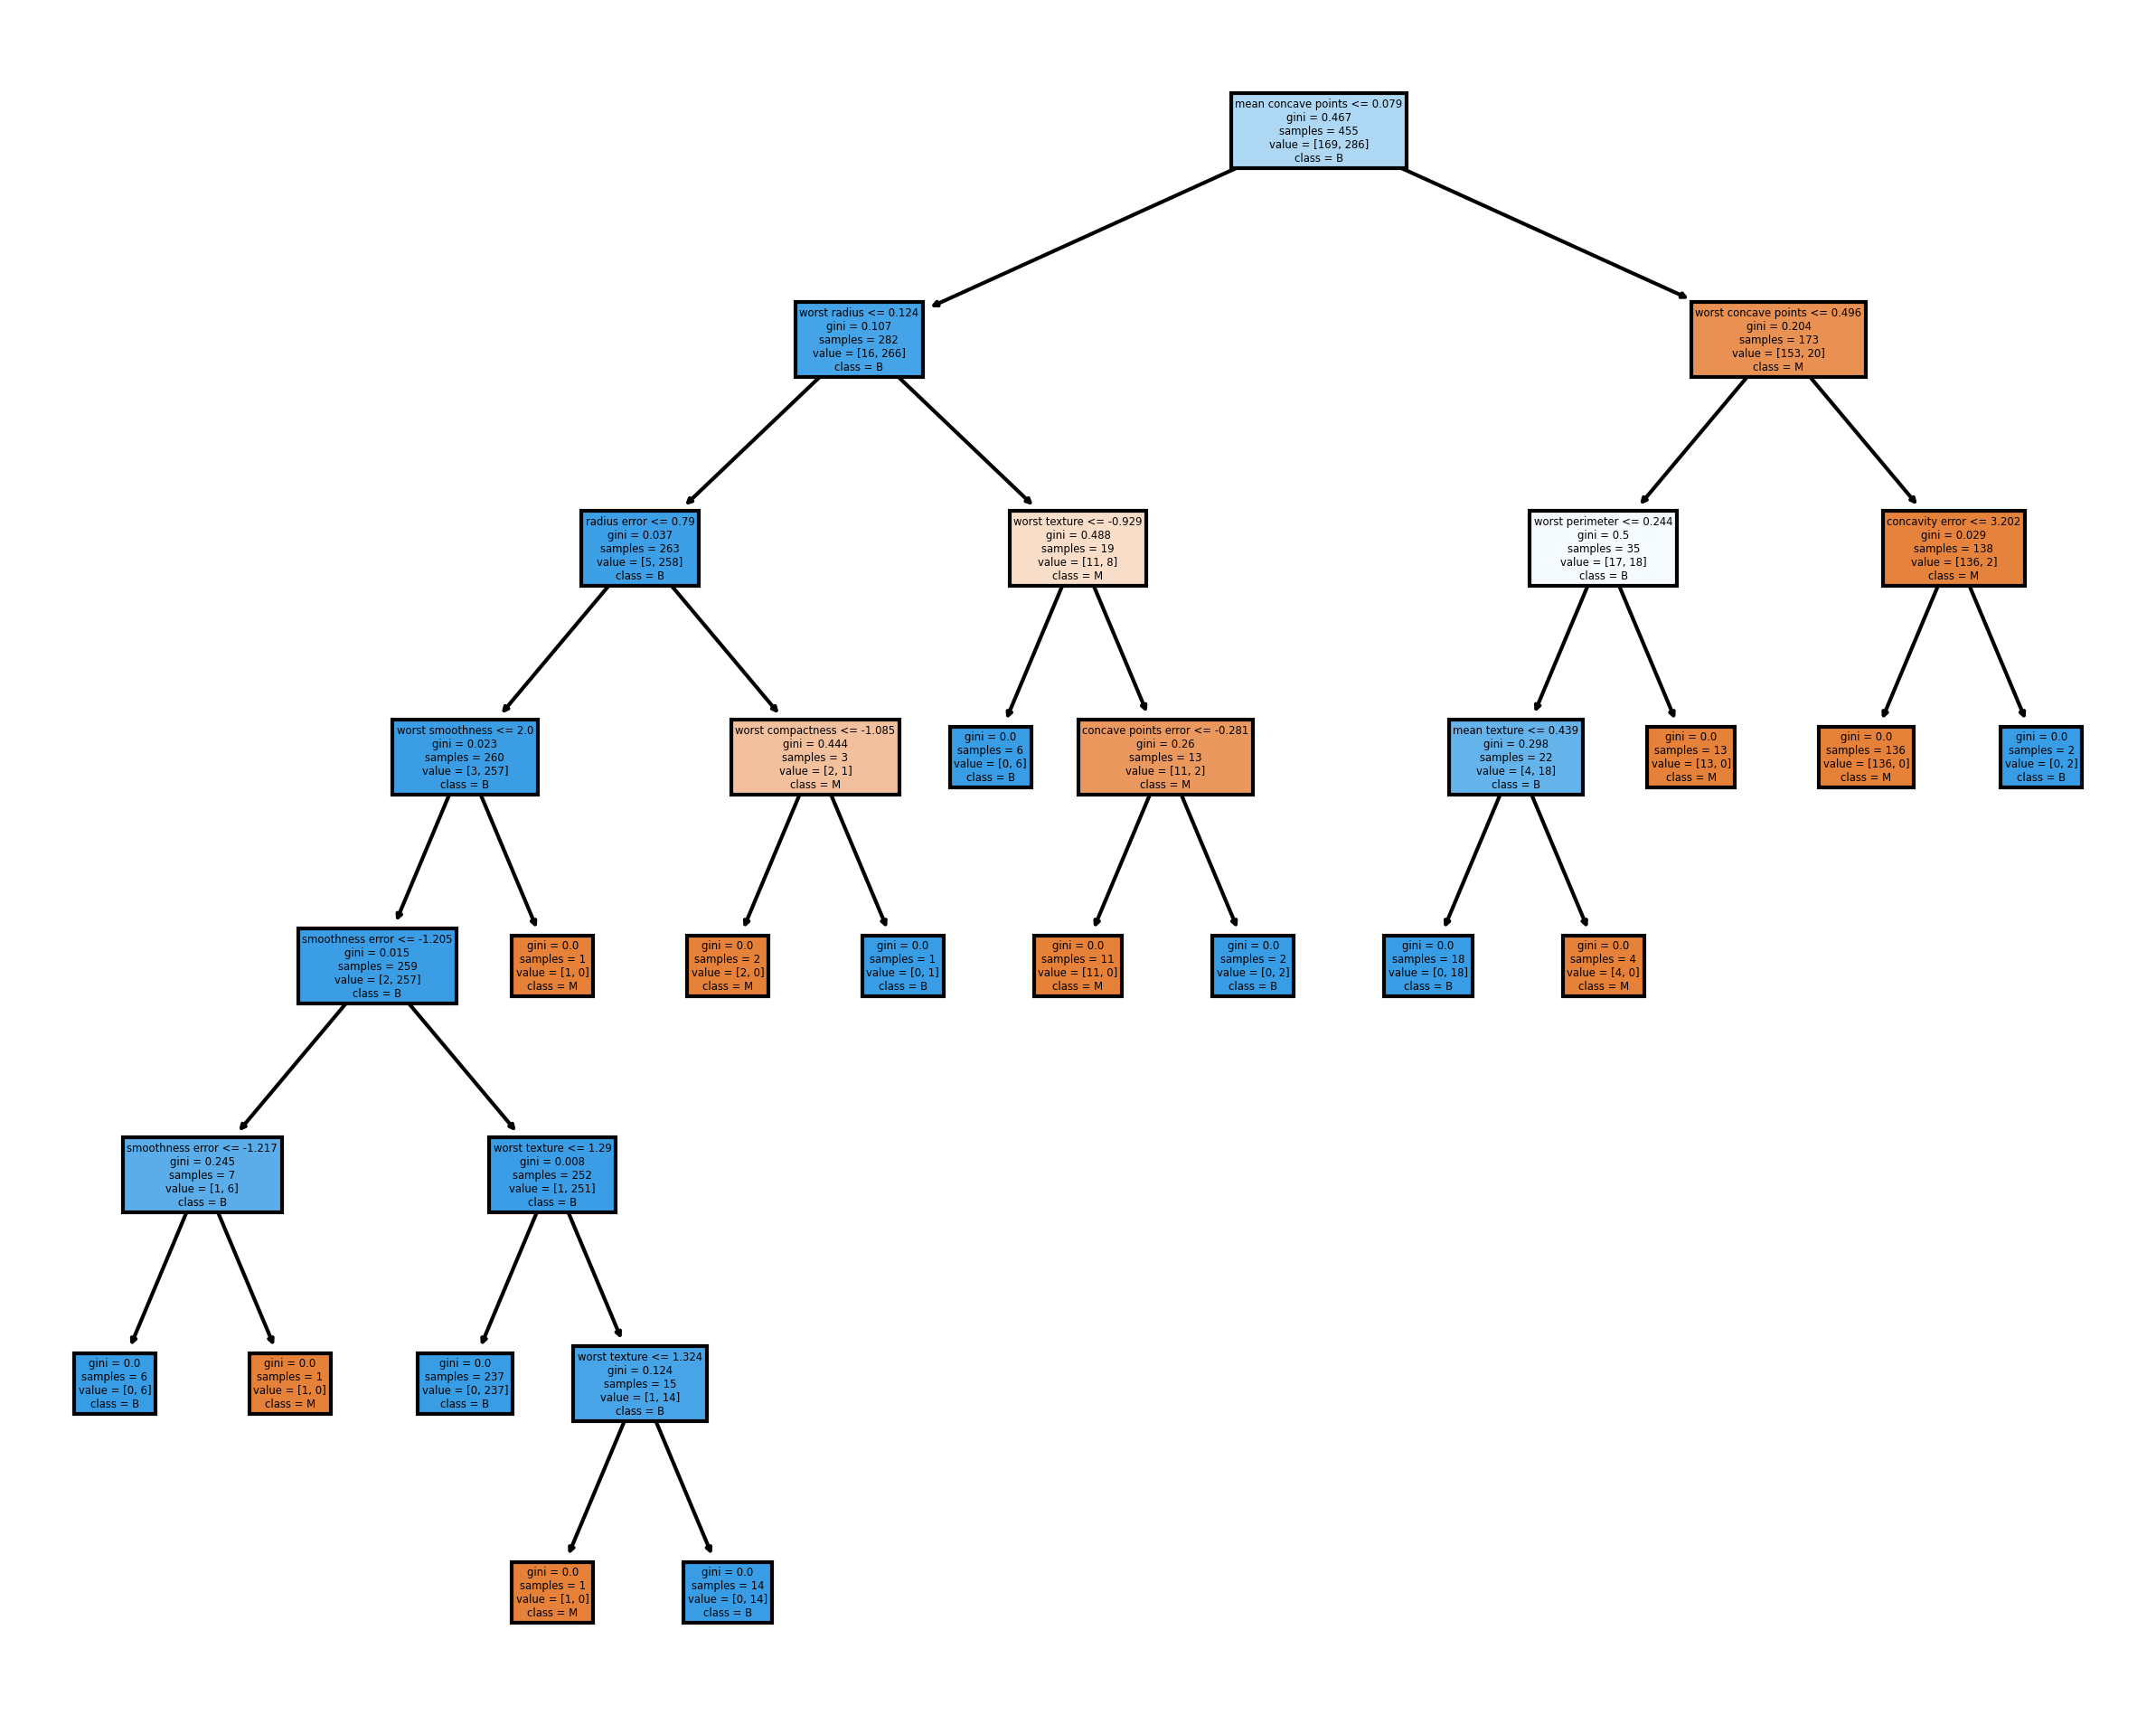

In [ ]:
from sklearn import tree

# Generate the text representation of the Decision Tree Classifier (dtc)
text_representation = tree.export_text(dtc)
print(text_representation)

# Get the list of feature names from the DataFrame 'df'
feature_names = df.columns.tolist()

# Define the target class names for the breast cancer dataset
target_names = ['M', 'B']  # 'M' stands for "malignant" and 'B' stands for "benign"

# Create a figure to display the Decision Tree Classifier
fig = plt.figure(figsize=(10, 8), dpi=300)

# Plot the Decision Tree Classifier using the 'tree.plot_tree' function
_ = tree.plot_tree(dtc,
                   feature_names=feature_names,
                   class_names=target_names,
                   filled=True)

*4 - 3: Random Forest Classifier* <a name="forest"></a>

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create the model
rfc = RandomForestClassifier()

# Fit the model to the training data
rfc.fit(X_train, y_train)

# Predict on the test data
y_pred = rfc.predict(X_test)

acc_rfc = accuracy_score(y_test, y_pred)
precision_rfc = precision_score(y_test, y_pred)
recall_rfc = recall_score(y_test, y_pred)
f1_rfc = f1_score(y_test, y_pred)

# Calculate the probabilities of the positive class
y_prob = rfc.predict_proba(X_test)[:, 1]
auc_rfc = roc_auc_score(y_test, y_prob)

*4 - 4: K-Nearest Neighbors Classifier* <a name="k"></a>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create the model
knn = KNeighborsClassifier()

# Fit the model to the training data
knn.fit(X_train, y_train)

# Predict on the test data
y_pred = knn.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred)
precision_knn = precision_score(y_test, y_pred)
recall_knn = recall_score(y_test, y_pred)
f1_knn = f1_score(y_test, y_pred)

# Calculate the probabilities of the positive class
y_prob = knn.predict_proba(X_test)[:, 1]
auc_knn = roc_auc_score(y_test, y_prob)

*4 - 5: Support Vector Machines (SVM) Classifier* <a name="svm"></a>

In [ ]:
from sklearn.svm import SVC

# Create the model
svm = SVC(probability=True)

# Fit the model to the training data
svm.fit(X_train, y_train)

# Predict on the test data
y_pred = svm.predict(X_test)

acc_svm = accuracy_score(y_test, y_pred)
precision_svm = precision_score(y_test, y_pred)
recall_svm = recall_score(y_test, y_pred)
f1_svm = f1_score(y_test, y_pred)

# Calculate the probabilities of the positive class
y_prob = svm.predict_proba(X_test)[:, 1]
auc_svm = roc_auc_score(y_test, y_prob)

# 5. Models Performance <a name="perform"></a>


In [ ]:
prediction_columns = ["NAME OF MODEL", "ACCURACY", 'Precision', 'Recall', 'F1', 'ROC']
df_pred = {
    "NAME OF MODEL" : ["Logistic Regression", "Decision Tree Classifier", "Random Forest Classifier", "KNN", "SVM"],
    "ACCURACY SCORE " : [acc_log, acc_knn, acc_svm, acc_dtc, acc_rfc],
    "Precision SCORE " : [precision_log, precision_knn, precision_svm, precision_dtc, precision_rfc],
    "Recall SCORE " : [recall_log, recall_knn, recall_svm, recall_dtc, recall_rfc],
    "F1 SCORE " : [f1_log, f1_knn, f1_svm, f1_dtc, f1_rfc],
    "ROC SCORE " : [auc_log, auc_knn, auc_svm, auc_dtc, auc_rfc],
}

df_predictions = pd.DataFrame (df_pred)
df_predictions

,NAME OF MODEL,ACCURACY SCORE,Precision SCORE,Recall SCORE,F1 SCORE,ROC SCORE
0,Logistic Regression,0.973684,0.972222,0.985915,0.979021,0.997380
1,Decision Tree Classifier,0.947368,0.957746,0.957746,0.957746,0.981985
2,Random Forest Classifier,0.982456,0.972603,1.000000,0.986111,0.997380
3,KNN,0.938596,0.957143,0.943662,0.950355,0.936947
4,SVM,0.964912,0.958904,0.985915,0.972222,0.994923


# 6. Hyperparameter Tuning <a name="tune"></a>


In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = [{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]} ]
grid_search = GridSearchCV(estimator = logreg,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy_log = grid_search.best_score_
best_parameters = grid_search.best_params_
print(best_accuracy_log)

0.9758241758241759


In [ ]:
parameters = [
    {
        "criterion": ["gini", "entropy"],
        "max_depth": [
            4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30, 40, 50, 70, 90, 120, 150,
        ],
        "max_leaf_nodes": [2, 4, 6, 10, 15, 30, 40, 50, 100],
        "min_samples_split": [2, 3, 4],
    }
]
grid_search = GridSearchCV(
    estimator=dtc, param_grid=parameters, scoring="accuracy", cv=10, n_jobs=-1
)
grid_search.fit(X_train, y_train)
best_accuracy_dtc = grid_search.best_score_
best_parameters = grid_search.best_params_
print(best_accuracy_dtc)
print(best_parameters)


0.9451690821256038
{'criterion': 'gini', 'max_depth': 4, 'max_leaf_nodes': 10, 'min_samples_split': 4}


In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 25, 50, None],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [2, 5]
}

rfc = RandomForestClassifier()

grid_search = GridSearchCV(estimator=rfc,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

best_accuracy_rfc = grid_search.best_score_
best_parameters = grid_search.best_params_

print("Best Accuracy:", best_accuracy_rfc)
print("Best Parameters:", best_parameters)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Accuracy: 0.964835164835165
Best Parameters: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
parameters = [
    {
        "n_neighbors": [3, 5, 7, 10, 13, 15],
        "weights": ["uniform", "distance"],
        "p": [1, 2],
    }
]
grid_search = GridSearchCV(
    estimator=knn, param_grid=parameters, scoring="accuracy", cv=10, n_jobs=-1
)
grid_search.fit(X_train, y_train)
best_accuracy_knn = grid_search.best_score_
best_parameters = grid_search.best_params_
print(best_accuracy_knn)


0.971304347826087


In [ ]:
# Define the parameter grid for SVM
param_grid_svm = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
}

# Create the SVM classifier
svm_classifier = SVC()

# Perform grid search with cross-validation for SVM
grid_search_svm = GridSearchCV(estimator=svm_classifier,
                               param_grid=param_grid_svm,
                               scoring='accuracy',
                               cv=10,
                               n_jobs=-1)

# Fit the grid search on the training data
grid_search_svm.fit(X_train, y_train)

# Get the best parameter values for SVM
best_accuracy_svm = grid_search_svm.best_score_
best_parameters_svm = grid_search_svm.best_params_

# Print the best accuracy and best parameters for SVM
print("Best Accuracy for SVM:", best_accuracy_svm)
print("Best Parameters for SVM:", best_parameters_svm)

Best Accuracy for SVM: 0.9780676328502415
Best Parameters for SVM: {'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}


In [ ]:
prediction_columns = ["NAME OF MODEL", "ACCURACY SCORE", "BEST ACCURACY (AFTER HYPER-PARAMETER TUNING)"]

df_pred = {
    "NAME OF MODEL" : ["LOGISTIC REGRESSION", "DECISION TREE", "RANDOM FOREST", "K-NN", "SVM"],
    "ACCURACY SCORE " : [acc_log, acc_dtc, acc_rfc, acc_knn, acc_svm],
    "BEST ACCURACY (AFTER HYPER-PARAMETER TUNING)" : [best_accuracy_log, best_accuracy_dtc, best_accuracy_rfc, best_accuracy_knn, best_accuracy_svm]
}

df_predictions = pd.DataFrame (df_pred)
df_predictions

,NAME OF MODEL,ACCURACY SCORE,BEST ACCURACY (AFTER HYPER-PARAMETER TUNING)
0,LOGISTIC REGRESSION,0.973684,0.975824
1,DECISION TREE,0.938596,0.945169
2,RANDOM FOREST,0.964912,0.964835
3,K-NN,0.947368,0.971304
4,SVM,0.982456,0.978068


# 8. Feature Selection <a name="feature"></a>


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Create SelectKBest object
selector = SelectKBest(score_func=f_classif, k=5)

# Fit selector to training data
selector.fit(X_train, y_train)

# Get the scores and indices of the selected features
scores = selector.scores_
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = df.columns[selected_indices]

# Print the scores and selected features
for score, feature in zip(scores, selected_features):
    print("Feature: ", feature, " with score: ", score)


Feature:  mean perimeter  with score:  482.23394459606124
Feature:  mean concave points  with score:  94.91778776570897
Feature:  worst radius  with score:  522.4892667951347
Feature:  worst perimeter  with score:  423.654133209976
Feature:  worst concave points  with score:  74.19014739907777


# 8. Model Comparison <a name="compare"></a>


In [ ]:
prediction_columns = ["NAME OF MODEL", "ACCURACY", "BEST ACCURACY (AFTER HYPER-PARAMETER TUNING)", 'Precision', 'Recall', 'F1', 'ROC']
df_pred = {
    "NAME OF MODEL" : ["Logistic Regression", "Decision Tree Classifier", "Random Forest Classifier", "KNN", "SVM"],
    "ACCURACY SCORE " : [acc_log, acc_dtc, acc_rfc, acc_knn, acc_svm],
    "BEST ACCURACY (AFTER HYPER-PARAMETER TUNING)" : [best_accuracy_log, best_accuracy_dtc, best_accuracy_rfc, best_accuracy_knn, best_accuracy_svm],
    "Precision SCORE " : [precision_log, precision_dtc, precision_rfc, precision_knn, precision_svm],
    "Recall SCORE " : [recall_log, recall_dtc, recall_rfc, recall_knn, recall_svm],
    "F1 SCORE " : [f1_log, f1_dtc, f1_rfc, f1_knn, f1_svm],
    "ROC SCORE " : [auc_log, auc_dtc, auc_rfc, auc_knn, auc_svm],
}

df_predictions = pd.DataFrame(df_pred)
df_predictions

,NAME OF MODEL,ACCURACY SCORE,BEST ACCURACY (AFTER HYPER-PARAMETER TUNING),Precision SCORE,Recall SCORE,F1 SCORE,ROC SCORE
0,Logistic Regression,0.973684,0.975824,0.972222,0.985915,0.979021,0.997380
1,Decision Tree Classifier,0.938596,0.945169,0.957143,0.943662,0.950355,0.936947
2,Random Forest Classifier,0.964912,0.964835,0.958904,0.985915,0.972222,0.994923
3,KNN,0.947368,0.971304,0.957746,0.957746,0.957746,0.981985
4,SVM,0.982456,0.978068,0.972603,1.000000,0.986111,0.997380


# Conclusions
In summary, the SUPPORT VECTOR MACHINE model emerged as the clear winner, achieving the highest accuracies both before and after hyper-parameter tuning. It obtained an accuracy of 0.982456 (98.2%) before tuning, which improved to 0.978068 (97.8%) after tuning. Consequently, it proves to be the most suitable model among the others for the given dataset.


*Check the following chart...*

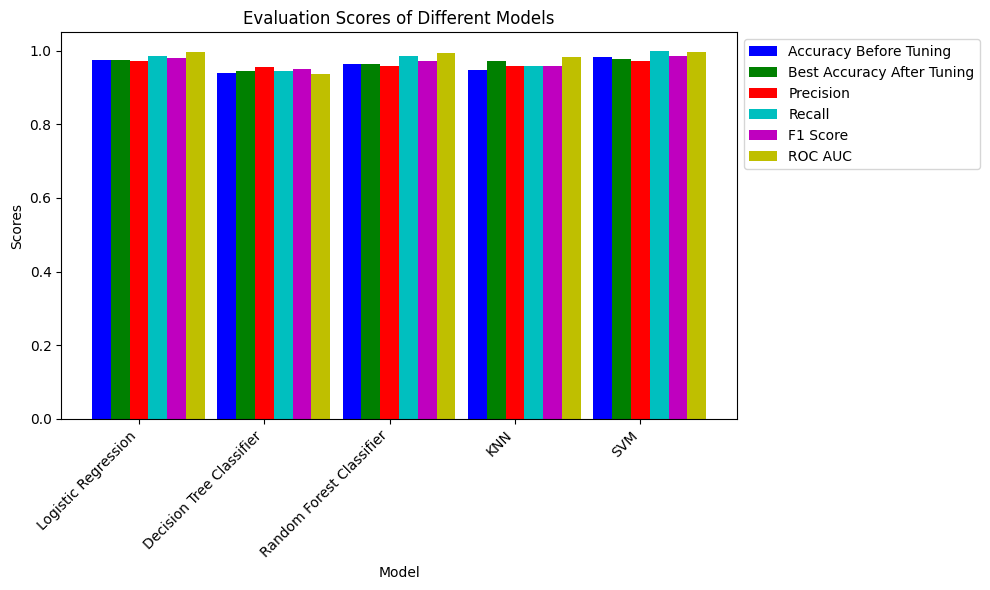

In [ ]:
# Data
models = ["Logistic Regression", "Decision Tree Classifier", "Random Forest Classifier", "KNN", "SVM"]
accuracy_scores = [acc_log, acc_dtc, acc_rfc, acc_knn, acc_svm]
best_accuracy_scores = [best_accuracy_log, best_accuracy_dtc, best_accuracy_rfc, best_accuracy_knn, best_accuracy_svm]
precision_scores = [precision_log, precision_dtc, precision_rfc, precision_knn, precision_svm]
recall_scores = [recall_log, recall_dtc, recall_rfc, recall_knn, recall_svm]
f1_scores = [f1_log, f1_dtc, f1_rfc, f1_knn, f1_svm]
auc_scores = [auc_log, auc_dtc, auc_rfc, auc_knn, auc_svm]

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.15
index = range(len(models))

# Plot the accuracy scores before hyperparameter tuning
ax.bar(index, accuracy_scores, bar_width, label='Accuracy Before Tuning', color='b')

# Plot the accuracy scores after hyperparameter tuning
ax.bar([i + bar_width for i in index], best_accuracy_scores, bar_width, label='Best Accuracy After Tuning', color='g')

# Plot other evaluation scores
ax.bar([i + bar_width*2 for i in index], precision_scores, bar_width, label='Precision', color='r')
ax.bar([i + bar_width*3 for i in index], recall_scores, bar_width, label='Recall', color='c')
ax.bar([i + bar_width*4 for i in index], f1_scores, bar_width, label='F1 Score', color='m')
ax.bar([i + bar_width*5 for i in index], auc_scores, bar_width, label='ROC AUC', color='y')

ax.set_xlabel('Model')
ax.set_ylabel('Scores')
ax.set_title('Evaluation Scores of Different Models')
ax.set_xticks([i + bar_width*2 for i in index])
ax.set_xticklabels(models, rotation=45, ha='right')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()